# ITO Data

1. Importing raw ITO images 
2. ITO image pre-processing
3.

### Importing raw ITO images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath('../ANN-code'))
from data_methods import create_file_paths

ito_dirs = ["../ANN-code/Data/ito_npy0/C", "../ANN-code/Data/ito_npy0/F"]
cam_dirs = ["../ANN-code/Data/im0/C", "../ANN-code/Data/im0/F"]

ito_file_paths = create_file_paths(ito_dirs)
cam_file_paths = create_file_paths(cam_dirs)

print("Number of ITO images: ", len(ito_file_paths))
print("Number of camera images: ", len(cam_file_paths))
print(ito_file_paths[0])
print(cam_file_paths[0])

100%|██████████| 9999/9999 [00:00<00:00, 1814356.29it/s]

Number of ITO images:  20000
Number of camera images:  19999
../ANN-code/Data/ito_npy0/C/4.189keV_0.000_0.000_C_1.131cm_4969_ito.npy
../ANN-code/Data/im0/F/108.249keV_0.000_0.000_F_1.447cm_8459_im.npy


Creating the Event objects with both event.image and event.ito_image as attributes

In [2]:
# For all examples we will use a list of 1000 events, which have an associated camera and ITO image.
# The file paths are shuffled upon creation, so here just taking the first 1000

from bb_event import Event
import random

events = []


ito_dict = {}
for path in ito_file_paths:
    filename = path.split("/")[-1]
    parts = filename.split("_")
    event_id = parts[0]
    ito_dict[event_id] = path

# 1000 sampled image paths
sampled_images = random.sample(cam_file_paths, 1000)

# Find corresponding ITO paths
matched_ito_paths = []
matched_image_paths = []
for cam_path in sampled_images:

    filename = path.split("/")[-1]
    parts = filename.split("_")
    event_id = parts[0]  # Extract event ID
    if event_id in ito_dict:
        matched_ito_paths.append(ito_dict[event_id])
        matched_image_paths.append(cam_path)

print("Number of matched images: ", len(matched_image_paths))

# Create event objects

events = []

for path_cam, path_ito in zip(matched_image_paths, matched_ito_paths):
    cam_image = np.load(path_cam)
    ito_image = np.load(path_ito)
    event = Event(path_cam, cam_image)
    event.ito_image = ito_image

    events.append(event)

print("Number of events: ", len(events))


Number of matched images:  1000
Number of events:  1000


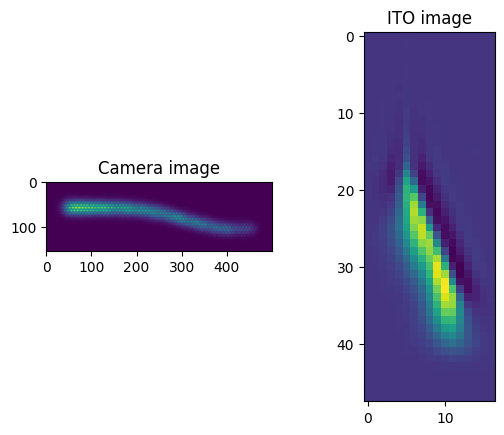

In [24]:
# Example of an event
# Plot the camera and ITO image side by side

event = events[0]
fig, axs = plt.subplots(1, 2)
axs[0].imshow(event.image)
axs[0].set_title("Camera image")
axs[1].imshow(event.ito_image)
axs[1].set_title("ITO image")
plt.show()


Notice that the ITO has a different resolution and seems stretched. in fact the pixels are non-square.

### ITO image preprocessing

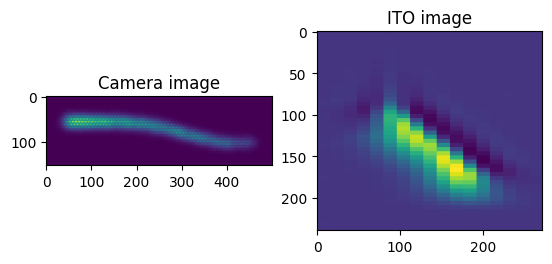

In [25]:
# Subdivide the ITO image to match the camera image (approximately)

def subdivxy(im,xscale=16,yscale=5):
    im_large = np.zeros((im.shape[0]*yscale, im.shape[1]*xscale))
    for i in np.arange(xscale):
        for j in np.arange(yscale):
            im_large[j::yscale,i::xscale] = im

    return im_large


event.ito_image = subdivxy(event.ito_image)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(event.image)
axs[0].set_title("Camera image")
axs[1].imshow(event.ito_image)
axs[1].set_title("ITO image")
plt.show()